<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

## MR relation
* [Kanodia+2019](https://github.com/shbhuk/mrexo)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
#initialize star properties
toiid = 179
star = cr.Star(toiid=toiid)

Target: TOI 179
Searching Vizier: (44.262 -56.1919) with radius=3.0 arcsec


In [3]:
import astropy.units as u

#is depth already corrected for dilution?
np.sqrt(star.toi_depth)*star.toi_params["Stellar Radius (R_Sun)"]*u.Rsun.to(u.Rearth)

3.082304374857223

In [4]:
#is Rp already corrected for dilution?
#seems not because it is smaller than above
star.toi_params["Planet Radius (R_Earth)"]

2.813921

In [5]:
toi_params = star.query_tic_catalog(return_nearest_xmatch=True)

Querying TIC catalog for ra,dec=(44.262 -56.1919) within 3.0 arcsec.


In [6]:
#cont ratio is too small to inflate radius from 2.8 to 3
star.toi_params["Planet Radius (R_Earth)"]*(1+star.tic_params.contratio)

2.8204870637325623

In [7]:
p = cr.Planet(toiid=179)

Target: TOI 179
Searching Vizier: (44.262 -56.1919) with radius=3.0 arcsec


In [8]:
p.get_Rp_from_depth()

Querying TIC catalog for ra,dec=(44.262 -56.1919) within 3.0 arcsec.


(3.3250594548626715, 1.3167238516457238, 1.2158015714564039)

In [9]:
p.toi_Rp, p.toi_Rp_err

(2.813921, 0.8975690000000001)

In [13]:
p.validate_Rp()

Relative error: 9.5%


In [10]:
p.get_Mp_from_MR_relation(use_toi_params=True)

(6.414975481626071, 3.7644913322118967, 9.363417843573156)

In [11]:
p.get_Mp_from_MR_relation(use_toi_params=False)

(6.969978548982104, 4.139631751652956, 11.011502820340505)

In [12]:
#Rp is derived from depth
p.get_Mp_from_MR_relation(use_toi_params=False)

(6.945883542261316, 4.125505728283651, 10.965078168577268)

In [14]:
K, K_siglo, K_sighi, K_samples = p.get_RV_amplitude(use_Rp_from_depth=False,
                                                    return_samples=True
                                                   )

P from TOI: 4.1374+/-0.0001 d
Rp from TOI: 2.81+/-0.90 Rearth
Mp estimate using Rp via MR relation: 6.41-3.76+9.36 Mearth
Mstar from starhorse catalog: 0.82+/-0.1 Msun
RV K: 3.69-0.61+0.60 m/s


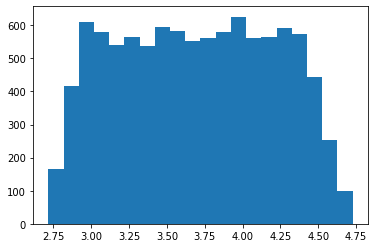

In [15]:
pl.hist(K_samples, bins=20);

In [16]:
K-K_sighi, K, K+K_sighi

(3.0996075259262605, 3.6946975320396236, 4.289787538152987)

## HARPS RV data

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
p = cr.Planet(toiid=179)

Target: TOI 179
Searching Vizier: (44.262 -56.1919) with radius=3.0 arcsec


Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

There are 1 matches: ['HD18599']
                                                1467
G [mag]                                        8.731
Dist [pc]                                      38.61
Data products (ascii)  HD18599_harps_all-data_v1.dat
Data products (csv)    HD18599_harps_all-data_v1.csv


Loaded:  /home/jp/github/research/project/chronos/chronos/../data/HD18599_harps_all-data_v1.csv
harps bank data validated.


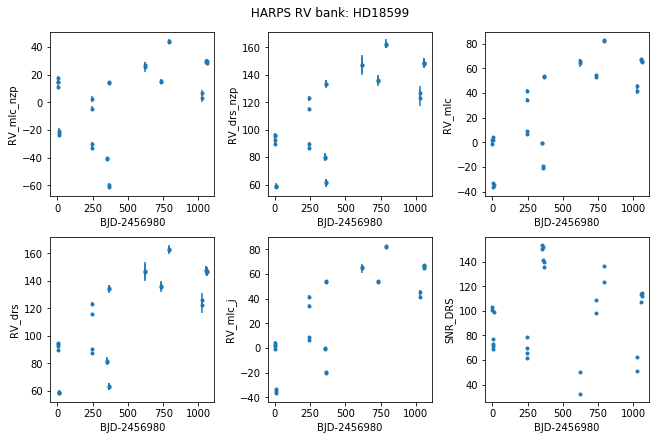

In [3]:
fig = p.plot_harps_rv_scatter(data_type='rv')

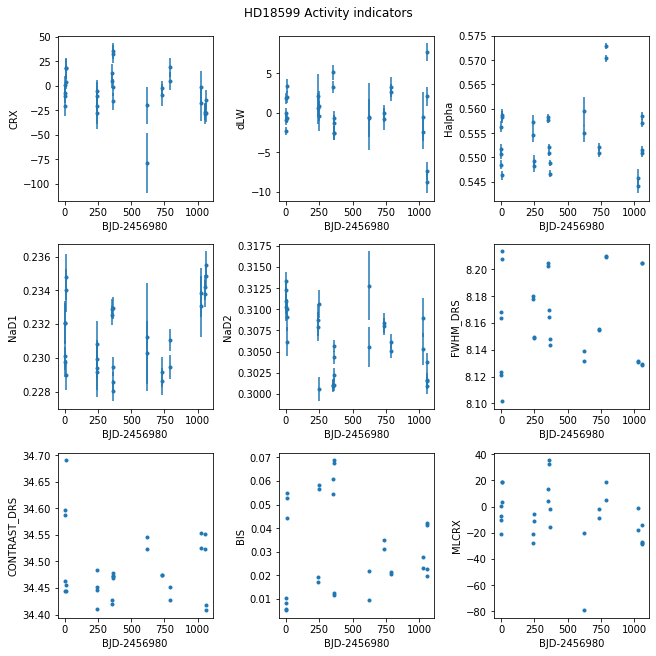

In [4]:
fig = p.plot_harps_rv_scatter(data_type='activity')

In [3]:
sc = cr.ShortCadence(toiid=179)
lc = sc.get_lc()

Target: TOI 179
Available sectors: [2 3]
Using sector=2.
Searching lightcurvefile for TIC 207141131 (sector 2)
Found 1 lightcurves


In [4]:
tmask = cr.get_transit_mask(lc, 
                            period=p.toi_period, 
                            epoch=p.toi_epoch, 
                            duration_hours=p.toi_duration
                           )
tmask

array([False, False, False, ..., False, False, False])

Using Lomb-Scargle method
P=4.49+/-0.31 d


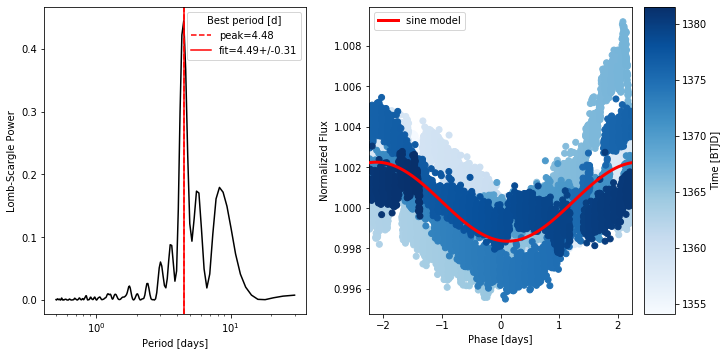

In [5]:
fig = cr.plot_rotation_period(lc.time, 
                              lc.flux, 
                              err=lc.flux_err,
                              transit_mask=tmask
                             )

In [6]:
p.toi_period

4.1373940000000005

  0%|          | 0/10 [00:00<?, ?it/s]

Computing generalized Lomb-Scargle periodograms:
['RV_mlc_nzp', 'RV_drs_nzp', 'CRX', 'dLW', 'Halpha', 'NaD1', 'NaD2', 'FWHM_DRS', 'CONTRAST_DRS', 'BIS']


100%|██████████| 10/10 [00:38<00:00,  3.77s/it]


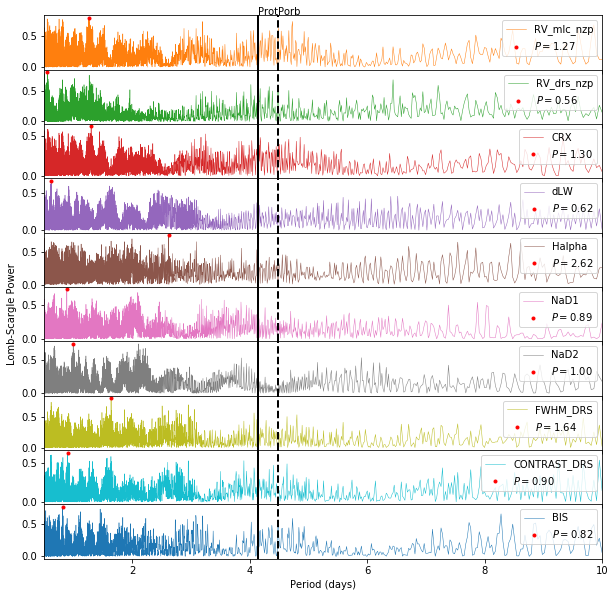

In [15]:
fig = p.plot_harps_rv_gls(#columns=['BIS','CRX'], 
                          Porb=p.toi_period, Prot=4.49,
                          plims=(0.5,10),
                         )

Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

There are 1 matches: ['HD18599']
                                                1467
G [mag]                                        8.731
Dist [pc]                                      38.61
Data products (ascii)  HD18599_harps_all-data_v1.dat
Data products (csv)    HD18599_harps_all-data_v1.csv


Loaded:  /home/jp/github/research/project/chronos/chronos/../data/HD18599_harps_all-data_v1.csv
harps bank data validated.


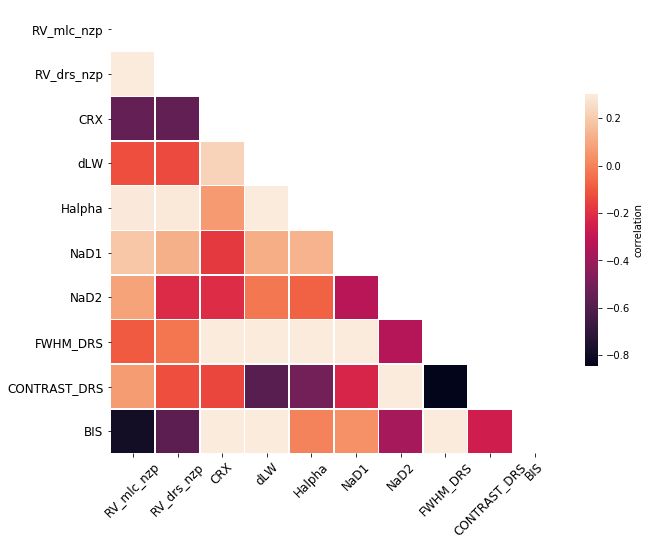

In [3]:
fig = p.plot_harps_rv_corr_matrix()

Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

There are 1 matches: ['HD18599']
                                                1467
G [mag]                                        8.731
Dist [pc]                                      38.61
Data products (ascii)  HD18599_harps_all-data_v1.dat
Data products (csv)    HD18599_harps_all-data_v1.csv


Loaded:  /home/jp/github/research/project/chronos/chronos/../data/HD18599_harps_all-data_v1.csv
harps bank data validated.


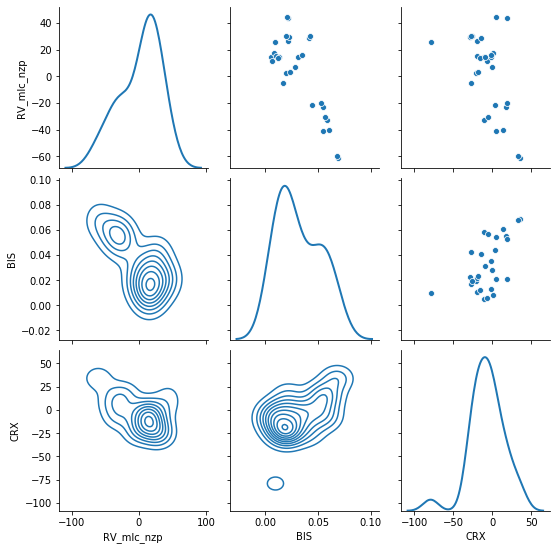

In [13]:
fig = p.plot_harps_pairplot(columns=['RV_mlc_nzp','BIS','CRX'])

## MR relation

In [14]:
import os
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from tqdm import tqdm
from mrexo import predict_from_measurement, generate_lookup_table
import chronos as cr

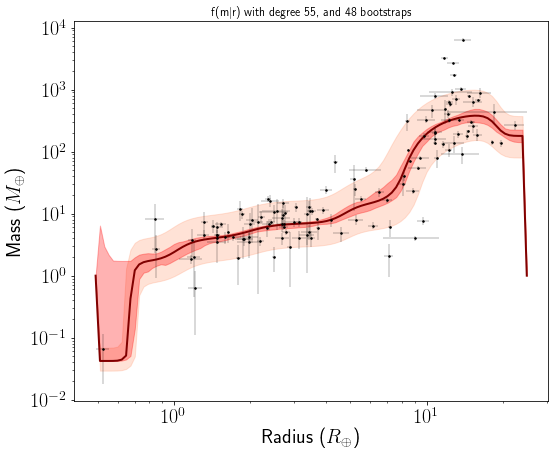

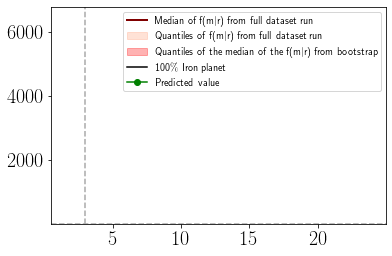

(6.821055511374721, array([ 2.90516413, 16.18517973]), 719.7242897156681)

In [4]:
predicted_mass, qtls, iron_planet = predict_from_measurement(measurement=3, 
                                                             measurement_sigma=0.1, 
                                                             result_dir=None, 
                                                             dataset='kepler', 
                                                             is_posterior=False,
                                                             predict='mass',
                                                             qtl = [0.16,0.84], 
                                                             show_plot=True
                                                            )
predicted_mass, qtls, iron_planet

In [6]:
tois = cr.get_tois()
tois.head()

,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar log(g) (cm/s^2) err,Stellar Radius (R_Sun),Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
0,231663901,101.01,NaN,5,5,5,5,5,5,5,...,NaN,0.86,NaN,NaN,NaN,1,2018-09-05 18:34:18,2019-12-17 15:43:31,2020-03-04 13:49:16,WASP-46 b
1,149603524,102.01,NaN,5,5,5,5,5,5,5,...,NaN,1.28,NaN,0.24,0.05,"1,2,3,4,6",2018-09-05 18:34:18,2019-12-17 15:43:39,2020-01-16 02:34:07,WASP 62b
2,336732616,103.01,NaN,5,5,5,5,5,5,5,...,NaN,1.40,NaN,NaN,NaN,1,2018-09-05 18:34:18,2019-12-17 15:43:31,2020-01-16 02:34:07,HATS-3
3,231670397,104.01,NaN,5,5,5,5,5,5,5,...,NaN,2.07,NaN,NaN,NaN,1,2018-09-05 18:34:18,2019-12-17 15:43:31,2020-01-16 02:34:07,WASP-73
4,144065872,105.01,NaN,5,5,5,5,5,5,5,...,NaN,1.13,NaN,NaN,NaN,1,2018-09-05 18:34:19,2019-12-17 15:43:31,2020-01-16 02:34:07,WASP-95


In [11]:
masses = {}
for key, row in tqdm(tois.iterrows()):
    toi = row['TOI']
    Rp = row['Planet Radius (R_Earth)']
    Rp_err = row['Planet Radius (R_Earth) err']
    Mp, (Mp_lo, Mp_hi), iron_planet = predict_from_measurement(measurement=Rp, 
                                                                measurement_sigma=Rp_err,
                                                                qtl = [0.16,0.84],
                                                                dataset = 'kepler',
                                                              )
    masses[toi] = (Mp, Mp_lo, Mp_hi)
    #print(f"{Mp} -{Mp-Mp_lo} +{Mp_hi-Mp}")

35it [00:10,  3.51it/s]

Mass of 100% Iron planet of 1.2676969999999999 Earth Radii = 6.701114421841147 Earth Mass (Fortney, Marley and Barnes 2007)


65it [00:20,  3.30it/s]

Mass of 100% Iron planet of 0.9905290000000001 Earth Radii = 2.356418463226129 Earth Mass (Fortney, Marley and Barnes 2007)


68it [00:21,  3.25it/s]

Mass of 100% Iron planet of 0.8578680000000001 Earth Radii = 1.3419555534444758 Earth Mass (Fortney, Marley and Barnes 2007)


92it [00:31,  2.42it/s]

Mass of 100% Iron planet of 1.2212020000000001 Earth Radii = 5.680474561202266 Earth Mass (Fortney, Marley and Barnes 2007)


102it [00:34,  2.88it/s]

Mass of 100% Iron planet of 1.004227 Earth Radii = 2.490791309536094 Earth Mass (Fortney, Marley and Barnes 2007)


134it [00:45,  3.17it/s]

Mass of 100% Iron planet of 1.1255709999999999 Earth Radii = 3.9959683740856833 Earth Mass (Fortney, Marley and Barnes 2007)


137it [00:46,  3.09it/s]

Mass of 100% Iron planet of 1.136554 Earth Radii = 4.164307904407204 Earth Mass (Fortney, Marley and Barnes 2007)


154it [00:52,  3.10it/s]

Mass of 100% Iron planet of 1.2975780000000001 Earth Radii = 7.438205000611233 Earth Mass (Fortney, Marley and Barnes 2007)


306it [01:48,  3.06it/s]

Mass of 100% Iron planet of 0.627402 Earth Radii = 0.43493783932563196 Earth Mass (Fortney, Marley and Barnes 2007)


309it [01:49,  3.27it/s]

Mass of 100% Iron planet of 1.161745 Earth Radii = 4.573689265908458 Earth Mass (Fortney, Marley and Barnes 2007)


460it [02:47,  2.16it/s]

Mass of 100% Iron planet of 1.071212 Earth Radii = 3.246177137754048 Earth Mass (Fortney, Marley and Barnes 2007)


461it [02:47,  2.44it/s]

Mass of 100% Iron planet of 1.175902 Earth Radii = 4.8186624918396435 Earth Mass (Fortney, Marley and Barnes 2007)


472it [02:51,  3.26it/s]

Mass of 100% Iron planet of 1.116355 Earth Radii = 3.85926839790642 Earth Mass (Fortney, Marley and Barnes 2007)


482it [02:54,  2.91it/s]

Mass of 100% Iron planet of 1.144488 Earth Radii = 4.2896858346275 Earth Mass (Fortney, Marley and Barnes 2007)


495it [02:59,  2.78it/s]

Mass of 100% Iron planet of 0.746412 Earth Radii = 0.800583893878651 Earth Mass (Fortney, Marley and Barnes 2007)


496it [02:59,  2.85it/s]

Mass of 100% Iron planet of 1.134371 Earth Radii = 4.1303702959897155 Earth Mass (Fortney, Marley and Barnes 2007)


501it [03:01,  2.99it/s]

Mass of 100% Iron planet of 1.037152 Earth Radii = 2.8407570871774293 Earth Mass (Fortney, Marley and Barnes 2007)


506it [03:03,  2.76it/s]

Mass of 100% Iron planet of 0.9202030000000001 Earth Radii = 1.759191321168674 Earth Mass (Fortney, Marley and Barnes 2007)


548it [03:17,  2.79it/s]

Mass of 100% Iron planet of 1.151749 Earth Radii = 4.407269260845465 Earth Mass (Fortney, Marley and Barnes 2007)


555it [03:20,  2.80it/s]

Mass of 100% Iron planet of 1.268556 Earth Radii = 6.721379713461872 Earth Mass (Fortney, Marley and Barnes 2007)


560it [03:22,  2.85it/s]

Mass of 100% Iron planet of 1.112357 Earth Radii = 3.8012304894114326 Earth Mass (Fortney, Marley and Barnes 2007)


561it [03:22,  2.88it/s]

Mass of 100% Iron planet of 0.815358 Earth Radii = 1.107851988754591 Earth Mass (Fortney, Marley and Barnes 2007)


614it [03:39,  3.27it/s]

Mass of 100% Iron planet of 1.159758 Earth Radii = 4.540182990015548 Earth Mass (Fortney, Marley and Barnes 2007)


649it [03:53,  3.11it/s]

Mass of 100% Iron planet of 0.933214 Earth Radii = 1.8587961097661192 Earth Mass (Fortney, Marley and Barnes 2007)


768it [04:56,  2.79it/s]

Mass of 100% Iron planet of 1.13486 Earth Radii = 4.137951647230693 Earth Mass (Fortney, Marley and Barnes 2007)


854it [05:39,  2.52it/s]

Mass of 100% Iron planet of 1.086224 Earth Radii = 3.440022266363819 Earth Mass (Fortney, Marley and Barnes 2007)


861it [05:41,  3.09it/s]

Mass of 100% Iron planet of 0.8794190000000001 Earth Radii = 1.4755910856155445 Earth Mass (Fortney, Marley and Barnes 2007)


862it [05:42,  3.08it/s]

Mass of 100% Iron planet of 1.186259 Earth Radii = 5.004992184101742 Earth Mass (Fortney, Marley and Barnes 2007)


887it [05:50,  2.74it/s]

Mass of 100% Iron planet of 1.280385 Earth Radii = 7.005924642163775 Earth Mass (Fortney, Marley and Barnes 2007)


1039it [06:58,  3.09it/s]

Mass of 100% Iron planet of 1.1598600000000001 Earth Radii = 4.5418978119677105 Earth Mass (Fortney, Marley and Barnes 2007)


1047it [07:01,  2.96it/s]

Mass of 100% Iron planet of 1.1091030000000002 Earth Radii = 3.754548966357825 Earth Mass (Fortney, Marley and Barnes 2007)


1049it [07:01,  2.85it/s]

Mass of 100% Iron planet of 1.280972 Earth Radii = 7.020314035845064 Earth Mass (Fortney, Marley and Barnes 2007)


1056it [07:04,  2.97it/s]

Mass of 100% Iron planet of 1.0332219999999999 Earth Radii = 2.7968966684614647 Earth Mass (Fortney, Marley and Barnes 2007)


1060it [07:05,  2.61it/s]

Mass of 100% Iron planet of 1.211208 Earth Radii = 5.479663332725405 Earth Mass (Fortney, Marley and Barnes 2007)


1065it [07:07,  2.72it/s]

Mass of 100% Iron planet of 1.273608 Earth Radii = 6.841648555934726 Earth Mass (Fortney, Marley and Barnes 2007)


1073it [07:10,  2.78it/s]

Mass of 100% Iron planet of 1.288563 Earth Radii = 7.208729587133681 Earth Mass (Fortney, Marley and Barnes 2007)


1345it [09:05,  2.65it/s]


In [63]:
import deepdish as dd

dd.io.save("../data/toi_Mp_from_MR_relation.hdf5", masses)

In [51]:
df = pd.DataFrame(masses).T
df.columns = ["Planet mass (Mp_Earth)", "Planet mass (Mp_Earth) lo", "Planet mass (Mp_Earth) hi"]
df.index.name = "TOI"
df = df.reset_index()
df.head()

,TOI,Planet mass (Mp_Earth),Planet mass (Mp_Earth) lo,Planet mass (Mp_Earth) hi
0,101.01,342.034952,127.494156,931.912367
1,102.01,377.103416,152.980876,980.335666
2,103.01,371.446377,147.230200,987.601462
3,104.01,327.045211,118.207200,901.004573
4,105.01,322.569277,115.572727,891.704816


## Estimate RV K amplitude

In [52]:
from uncertainties import unumpy
import astropy.units as u
import astropy.constants as c

def RV_K(P_days, Ms_Msun, mp_Mearth, ecc=0., inc_deg=90., with_unit=False):
    '''Compute the RV semiamplitude in m/s'''
    P = P_days*u.day.to(u.second)*u.second
    Ms = Ms_Msun*u.Msun.to(u.kg)*u.kg
    mp = mp_Mearth*u.Mearth.to(u.kg)*u.kg
    inc = np.deg2rad(inc_deg)
    K_ms = (2*np.pi*c.G/(P*Ms*Ms))**(1./3) * mp*np.sin(inc) / \
            unumpy.sqrt(1-ecc**2)
    if with_unit:
        return K_ms
    else:
        return K_ms.value

In [66]:
df['RV_K'] = RV_K(tois['Period (days)'], 
            tois['Stellar Radius (R_Sun)'],  #should be 
            df['Planet mass (Mp_Earth)'], 
            with_unit=True)

df['RV_K_lo'] = RV_K(tois['Period (days)'], 
            tois['Stellar Radius (R_Sun)'],  #should be 
            df['Planet mass (Mp_Earth) lo'], 
            with_unit=True)

df['RV_K_hi'] = RV_K(tois['Period (days)'], 
            tois['Stellar Radius (R_Sun)'],  #should be 
            df['Planet mass (Mp_Earth) hi'], 
            with_unit=True)
df.tail()

,TOI,Planet mass (Mp_Earth),Planet mass (Mp_Earth) lo,Planet mass (Mp_Earth) hi,RV_K_lo,RV_K_hi,RV_K
1340,1789.01,321.638570,121.592666,853.593918,50.2442,352.72,132.907
1341,1790.01,5.361155,2.222578,13.139641,NaN,NaN,NaN
1342,1791.01,8.692156,3.468526,22.738370,0.626664,4.10818,1.57043
1343,1792.01,7.445579,2.971223,20.287383,NaN,NaN,NaN
1344,1793.01,7.878945,3.239096,19.864467,0.747953,4.58699,1.81936


In [67]:
joint = pd.merge(tois, df, on="TOI")
joint.to_csv('../data/TOIs2.csv', index=False)